In [2]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
CATEGORIES = []
for i in range(0,32):
    CATEGORIES.append(str(i))

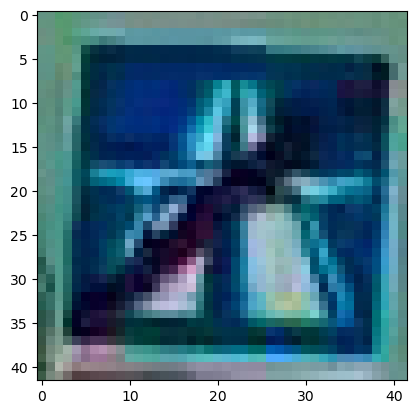

In [53]:
DATADIR = 'data_2/TRAIN'
    
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap='gray')
        plt.show()
        break
    break




In [5]:
print(img.shape)

(42, 42)


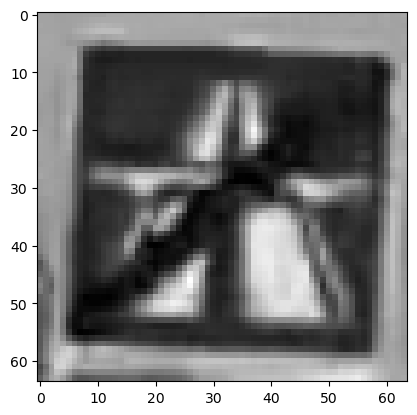

In [6]:
IMG_SIZE = 64

new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [9]:
print(new_array.shape)

(64, 64)


### Creating train data

In [9]:
def create_training_data(img_size = 64, color = False):
    IMG_SIZE = img_size
    training_data = []
    DATADIR = 'data_2/TRAIN'
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            try:
                print(path, img)
                img_arr = []
                if color:
                    img_arr = cv2.imread(os.path.join(path,img))
                    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                else:
                    img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
                pass
                    
    return training_data

In [10]:
IMG_SIZE = 64
train_data = create_training_data(64)

data_2/TRAIN\0 0356.jpg
data_2/TRAIN\0 0357.jpg
data_2/TRAIN\0 0457.jpg
data_2/TRAIN\0 0460.jpg
data_2/TRAIN\0 0463.jpg
data_2/TRAIN\0 0466.jpg
data_2/TRAIN\0 0470.jpg
data_2/TRAIN\0 1562.jpg
data_2/TRAIN\0 1566.jpg
data_2/TRAIN\0 1570.jpg
data_2/TRAIN\0 1683.jpg
data_2/TRAIN\0 1689.jpg
data_2/TRAIN\0 1699.jpg
data_2/TRAIN\0 1719.jpg
data_2/TRAIN\0 1722.jpg
data_2/TRAIN\0 1727.jpg
data_2/TRAIN\0 1730.jpg
data_2/TRAIN\0 1784.jpg
data_2/TRAIN\0 1956.jpg
data_2/TRAIN\0 2044.jpg
data_2/TRAIN\0 2047.jpg
data_2/TRAIN\0 2050.jpg
data_2/TRAIN\0 2196.jpg
data_2/TRAIN\0 2199.jpg
data_2/TRAIN\0 2284.jpg
data_2/TRAIN\0 2287.jpg
data_2/TRAIN\0 2303.jpg
data_2/TRAIN\0 2603.jpg
data_2/TRAIN\0 2606.jpg
data_2/TRAIN\0 2678.jpg
data_2/TRAIN\0 2680.jpg
data_2/TRAIN\0 2681.jpg
data_2/TRAIN\0 2682.jpg
data_2/TRAIN\0 2691.jpg
data_2/TRAIN\0 3635.jpg
data_2/TRAIN\0 3638.jpg
data_2/TRAIN\0 3641.jpg
data_2/TRAIN\0 3644.jpg
data_2/TRAIN\0 3647.jpg
data_2/TRAIN\0 3650.jpg
data_2/TRAIN\0 3653.jpg
data_2/TRAIN\0 3

data_2/TRAIN\5 3618.jpg
data_2/TRAIN\5 3623.jpg
data_2/TRAIN\5 3625.jpg
data_2/TRAIN\5 3627.jpg
data_2/TRAIN\5 3628.jpg
data_2/TRAIN\5 3667.jpg
data_2/TRAIN\5 3668.jpg
data_2/TRAIN\5 3669.jpg
data_2/TRAIN\5 3670.jpg
data_2/TRAIN\5 3671.jpg
data_2/TRAIN\5 3673.jpg
data_2/TRAIN\5 3674.jpg
data_2/TRAIN\5 3685.jpg
data_2/TRAIN\5 3690.jpg
data_2/TRAIN\5 3691.jpg
data_2/TRAIN\5 3692.jpg
data_2/TRAIN\5 4205.jpg
data_2/TRAIN\5 4207.jpg
data_2/TRAIN\5 4210.jpg
data_2/TRAIN\5 4212.jpg
data_2/TRAIN\5 4214.jpg
data_2/TRAIN\5 4215.jpg
data_2/TRAIN\5 4245.jpg
data_2/TRAIN\5 4246.jpg
data_2/TRAIN\5 4247.jpg
data_2/TRAIN\5 4249.jpg
data_2/TRAIN\5 4523.jpg
data_2/TRAIN\5 4524.jpg
data_2/TRAIN\5 4577.jpg
data_2/TRAIN\5 4579.jpg
data_2/TRAIN\5 4580.jpg
data_2/TRAIN\5 4582.jpg
data_2/TRAIN\5 4583.jpg
data_2/TRAIN\5 4587.jpg
data_2/TRAIN\5 4588.jpg
data_2/TRAIN\5 4589.jpg
data_2/TRAIN\5 4594.jpg
data_2/TRAIN\5 4597.jpg
data_2/TRAIN\5 4599.jpg
data_2/TRAIN\5 4600.jpg
data_2/TRAIN\5 4602.jpg
data_2/TRAIN\5 4

data_2/TRAIN\11 3870.jpg
data_2/TRAIN\11 3871.jpg
data_2/TRAIN\11 3875.jpg
data_2/TRAIN\11 3876.jpg
data_2/TRAIN\11 3883.jpg
data_2/TRAIN\11 3885.jpg
data_2/TRAIN\11 3886.jpg
data_2/TRAIN\11 3890.jpg
data_2/TRAIN\11 3892.jpg
data_2/TRAIN\11 3894.jpg
data_2/TRAIN\11 3895.jpg
data_2/TRAIN\11 3896.jpg
data_2/TRAIN\11 3897.jpg
data_2/TRAIN\11 3990.jpg
data_2/TRAIN\11 3995.jpg
data_2/TRAIN\11 4051.jpg
data_2/TRAIN\11 4620.jpg
data_2/TRAIN\11 4621.jpg
data_2/TRAIN\11 4623.jpg
data_2/TRAIN\11 4626.jpg
data_2/TRAIN\11 4628.jpg
data_2/TRAIN\11 4702.jpg
data_2/TRAIN\11 4703.jpg
data_2/TRAIN\11 4710.jpg
data_2/TRAIN\11 4711.jpg
data_2/TRAIN\11 4840.jpg
data_2/TRAIN\11 4841.jpg
data_2/TRAIN\11 4842.jpg
data_2/TRAIN\11 4845.jpg
data_2/TRAIN\11 4864.jpg
data_2/TRAIN\11 4872.jpg
data_2/TRAIN\11 4875.jpg
data_2/TRAIN\11 4877.jpg
data_2/TRAIN\12 0539.jpg
data_2/TRAIN\12 0542.jpg
data_2/TRAIN\12 2401.jpg
data_2/TRAIN\12 2403.jpg
data_2/TRAIN\12 2406.jpg
data_2/TRAIN\12 2410.jpg
data_2/TRAIN\12 2779.jpg


data_2/TRAIN\16 3034.jpg
data_2/TRAIN\16 3035.jpg
data_2/TRAIN\16 3036.jpg
data_2/TRAIN\16 3044.jpg
data_2/TRAIN\16 3045.jpg
data_2/TRAIN\16 3065.jpg
data_2/TRAIN\16 3089.jpg
data_2/TRAIN\16 3090.jpg
data_2/TRAIN\16 3094.jpg
data_2/TRAIN\16 3095.jpg
data_2/TRAIN\16 3096.jpg
data_2/TRAIN\16 3110.jpg
data_2/TRAIN\16 3111.jpg
data_2/TRAIN\16 3123.jpg
data_2/TRAIN\16 3126.jpg
data_2/TRAIN\16 3129.jpg
data_2/TRAIN\16 3130.jpg
data_2/TRAIN\16 3131.jpg
data_2/TRAIN\16 3154.jpg
data_2/TRAIN\16 3155.jpg
data_2/TRAIN\16 3158.jpg
data_2/TRAIN\16 3159.jpg
data_2/TRAIN\16 3165.jpg
data_2/TRAIN\16 3198.jpg
data_2/TRAIN\16 3199.jpg
data_2/TRAIN\16 3201.jpg
data_2/TRAIN\16 3205.jpg
data_2/TRAIN\16 3214.jpg
data_2/TRAIN\16 3215.jpg
data_2/TRAIN\16 3242.jpg
data_2/TRAIN\16 3250.jpg
data_2/TRAIN\16 3253.jpg
data_2/TRAIN\16 3254.jpg
data_2/TRAIN\16 3255.jpg
data_2/TRAIN\16 3264.jpg
data_2/TRAIN\16 3265.jpg
data_2/TRAIN\16 3266.jpg
data_2/TRAIN\16 3267.jpg
data_2/TRAIN\16 3276.jpg
data_2/TRAIN\16 3289.jpg


data_2/TRAIN\22 0773.jpg
data_2/TRAIN\22 1039.jpg
data_2/TRAIN\22 1314.jpg
data_2/TRAIN\22 1316.jpg
data_2/TRAIN\22 1318.jpg
data_2/TRAIN\22 1320.jpg
data_2/TRAIN\22 1460.jpg
data_2/TRAIN\22 1464.jpg
data_2/TRAIN\22 1467.jpg
data_2/TRAIN\22 1516.jpg
data_2/TRAIN\22 1518.jpg
data_2/TRAIN\22 1520.jpg
data_2/TRAIN\22 1522.jpg
data_2/TRAIN\22 1546.jpg
data_2/TRAIN\22 1547.jpg
data_2/TRAIN\22 1548.jpg
data_2/TRAIN\22 1578.jpg
data_2/TRAIN\22 1580.jpg
data_2/TRAIN\22 1667.jpg
data_2/TRAIN\22 1669.jpg
data_2/TRAIN\22 1671.jpg
data_2/TRAIN\22 1715.jpg
data_2/TRAIN\22 1717.jpg
data_2/TRAIN\22 1749.jpg
data_2/TRAIN\22 1754.jpg
data_2/TRAIN\22 1756.jpg
data_2/TRAIN\22 1803.jpg
data_2/TRAIN\22 1805.jpg
data_2/TRAIN\22 1808.jpg
data_2/TRAIN\22 1810.jpg
data_2/TRAIN\22 1812.jpg
data_2/TRAIN\22 1822.jpg
data_2/TRAIN\22 1824.jpg
data_2/TRAIN\22 1826.jpg
data_2/TRAIN\22 1828.jpg
data_2/TRAIN\22 1832.jpg
data_2/TRAIN\22 1834.jpg
data_2/TRAIN\22 1838.jpg
data_2/TRAIN\22 1856.jpg
data_2/TRAIN\22 1861.jpg


data_2/TRAIN\27 3010.jpg
data_2/TRAIN\27 3026.jpg
data_2/TRAIN\27 3028.jpg
data_2/TRAIN\27 3042.jpg
data_2/TRAIN\27 3043.jpg
data_2/TRAIN\27 3097.jpg
data_2/TRAIN\27 3099.jpg
data_2/TRAIN\27 3100.jpg
data_2/TRAIN\27 3135.jpg
data_2/TRAIN\27 3140.jpg
data_2/TRAIN\27 3152.jpg
data_2/TRAIN\27 3153.jpg
data_2/TRAIN\27 3156.jpg
data_2/TRAIN\27 3169.jpg
data_2/TRAIN\27 3171.jpg
data_2/TRAIN\27 3256.jpg
data_2/TRAIN\27 3262.jpg
data_2/TRAIN\27 3263.jpg
data_2/TRAIN\27 3282.jpg
data_2/TRAIN\27 3283.jpg
data_2/TRAIN\27 4185.jpg
data_2/TRAIN\27 4187.jpg
data_2/TRAIN\27 4188.jpg
data_2/TRAIN\27 4189.jpg
data_2/TRAIN\27 4190.jpg
data_2/TRAIN\27 4191.jpg
data_2/TRAIN\27 4192.jpg
data_2/TRAIN\27 4193.jpg
data_2/TRAIN\27 4194.jpg
data_2/TRAIN\27 4291.jpg
data_2/TRAIN\27 4619.jpg
data_2/TRAIN\27 4622.jpg
data_2/TRAIN\27 4624.jpg
data_2/TRAIN\27 4625.jpg
data_2/TRAIN\27 4627.jpg
data_2/TRAIN\27 4629.jpg
data_2/TRAIN\27 4694.jpg
data_2/TRAIN\27 4806.jpg
data_2/TRAIN\27 4809.jpg
data_2/TRAIN\27 5631.jpg


In [11]:
print(len(train_data))

2895


In [12]:
random.seed(19)
random.shuffle(train_data)

In [13]:
for sample in train_data[:10]:
    print(sample[1])

13
21
24
28
1
0
27
18
10
12


In [14]:
X = []
y = []
for features, label in train_data:
    X.append(features)
    y.append(label)
print(X[:10])
print(y[:10])

[array([[29, 30, 29, ..., 18, 18, 19],
       [27, 28, 26, ..., 10, 13, 18],
       [28, 25, 25, ..., 31,  8, 18],
       ...,
       [26, 74, 86, ..., 30, 38, 38],
       [33, 21, 27, ..., 33, 36, 36],
       [37, 33, 31, ..., 37, 36, 34]], dtype=uint8), array([[159, 157, 161, ..., 154, 177, 120],
       [159, 158, 161, ..., 158, 181, 123],
       [159, 157, 161, ..., 177, 195, 131],
       ...,
       [163, 163, 163, ..., 106, 106, 106],
       [163, 163, 163, ..., 106, 106, 106],
       [163, 163, 163, ..., 106, 106, 106]], dtype=uint8), array([[ 61,  48,  50, ..., 139,  70,  59],
       [ 62,  48,  47, ...,  73,  49,  69],
       [ 62,  38,  41, ...,  32,  53,  67],
       ...,
       [ 86,  47,  52, ...,  52,  74,  88],
       [ 84,  52,  62, ...,  70,  93,  96],
       [ 69,  53,  75, ...,  81,  89, 100]], dtype=uint8), array([[ 73,  71,  56, ..., 133, 100,  88],
       [ 73,  71,  62, ..., 173, 177, 175],
       [ 74,  76,  65, ..., 166, 160, 167],
       ...,
       [ 78,  76, 

In [15]:
X[0].shape

(64, 64)

In [16]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X[0].shape

(64, 64, 1)

In [17]:
y = np.array(y)

In [18]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Creating test data

In [19]:
def create_test_data(img_size = 64, color = False):
    IMG_SIZE = img_size
    test_data = []
    DATADIR = 'data_2/TEST'
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            try:
                print(path, img)
                img_arr = []
                if color:
                    img_arr = cv2.imread(os.path.join(path,img))
                    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                else:
                    img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
                pass
                    
    return test_data

In [20]:
test_data = create_test_data()

data_2/TEST\0 0358.jpg
data_2/TEST\0 0459.jpg
data_2/TEST\0 1698.jpg
data_2/TEST\0 1721.jpg
data_2/TEST\0 2269.jpg
data_2/TEST\0 2271.jpg
data_2/TEST\0 2283.jpg
data_2/TEST\0 2292.jpg
data_2/TEST\0 2298.jpg
data_2/TEST\0 5412.jpg
data_2/TEST\1 0777.jpg
data_2/TEST\1 2376.jpg
data_2/TEST\1 2420.jpg
data_2/TEST\1 2735.jpg
data_2/TEST\1 2746.jpg
data_2/TEST\1 2903.jpg
data_2/TEST\1 2911.jpg
data_2/TEST\1 2912.jpg
data_2/TEST\1 2920.jpg
data_2/TEST\1 2932.jpg
data_2/TEST\1 5691.jpg
data_2/TEST\2 0604.jpg
data_2/TEST\2 1774.jpg
data_2/TEST\2 1876.jpg
data_2/TEST\2 2208.jpg
data_2/TEST\2 2262.jpg
data_2/TEST\2 3600.jpg
data_2/TEST\2 3604.jpg
data_2/TEST\2 5624.jpg
data_2/TEST\3 0617.jpg
data_2/TEST\3 0638.jpg
data_2/TEST\3 1630.jpg
data_2/TEST\3 1651.jpg
data_2/TEST\3 1743.jpg
data_2/TEST\3 1819.jpg
data_2/TEST\3 1870.jpg
data_2/TEST\3 2132.jpg
data_2/TEST\3 2558.jpg
data_2/TEST\3 2573.jpg
data_2/TEST\3 2577.jpg
data_2/TEST\3 5496.jpg
data_2/TEST\4 2539.jpg
data_2/TEST\4 3052.jpg
data_2/TEST

In [21]:
random.seed(19)
random.shuffle(test_data)

In [22]:
for sample in test_data[:10]:
    print(sample[1])

5
11
21
24
7
7
8
22
1
1


In [23]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
print(X_test[:10])
print(y_test[:10])

[array([[164, 164, 163, ...,  78,  89, 144],
       [164, 164, 165, ...,  81,  86, 142],
       [163, 164, 164, ...,  81,  82, 139],
       ...,
       [ 23,  23,  23, ...,  74,  26,  42],
       [ 24,  23,  22, ...,  70,  30,  41],
       [ 24,  22,  24, ...,  61,  29,  35]], dtype=uint8), array([[44, 44, 44, ..., 43, 43, 43],
       [44, 44, 43, ..., 43, 43, 43],
       [43, 43, 43, ..., 43, 43, 43],
       ...,
       [39, 40, 42, ..., 39, 39, 39],
       [40, 40, 42, ..., 39, 39, 39],
       [40, 41, 42, ..., 39, 39, 39]], dtype=uint8), array([[114,  97, 165, ..., 120, 122, 113],
       [ 82,  75,  59, ..., 125, 121, 115],
       [ 81,  74,  64, ..., 108,  90,  90],
       ...,
       [240,  71, 225, ...,  74,  84,  70],
       [202, 166, 202, ...,  61,  63,  68],
       [175, 163,  56, ...,  57,  60,  57]], dtype=uint8), array([[110, 130,  66, ...,  84,  53, 100],
       [127,  47,  48, ...,  70, 140, 121],
       [135, 168, 125, ..., 157, 162, 188],
       ...,
       [ 79,  78, 

In [24]:
X_test[0].shape

(64, 64)

In [25]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test[0].shape

(64, 64, 1)

In [26]:
y_test = np.array(y_test)

In [27]:
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

### Creating Colored image data

In [28]:
IMG_SIZE = 64
train_data_color = create_training_data(64, True)

data_2/TRAIN\0 0356.jpg
data_2/TRAIN\0 0357.jpg
data_2/TRAIN\0 0457.jpg
data_2/TRAIN\0 0460.jpg
data_2/TRAIN\0 0463.jpg
data_2/TRAIN\0 0466.jpg
data_2/TRAIN\0 0470.jpg
data_2/TRAIN\0 1562.jpg
data_2/TRAIN\0 1566.jpg
data_2/TRAIN\0 1570.jpg
data_2/TRAIN\0 1683.jpg
data_2/TRAIN\0 1689.jpg
data_2/TRAIN\0 1699.jpg
data_2/TRAIN\0 1719.jpg
data_2/TRAIN\0 1722.jpg
data_2/TRAIN\0 1727.jpg
data_2/TRAIN\0 1730.jpg
data_2/TRAIN\0 1784.jpg
data_2/TRAIN\0 1956.jpg
data_2/TRAIN\0 2044.jpg
data_2/TRAIN\0 2047.jpg
data_2/TRAIN\0 2050.jpg
data_2/TRAIN\0 2196.jpg
data_2/TRAIN\0 2199.jpg
data_2/TRAIN\0 2284.jpg
data_2/TRAIN\0 2287.jpg
data_2/TRAIN\0 2303.jpg
data_2/TRAIN\0 2603.jpg
data_2/TRAIN\0 2606.jpg
data_2/TRAIN\0 2678.jpg
data_2/TRAIN\0 2680.jpg
data_2/TRAIN\0 2681.jpg
data_2/TRAIN\0 2682.jpg
data_2/TRAIN\0 2691.jpg
data_2/TRAIN\0 3635.jpg
data_2/TRAIN\0 3638.jpg
data_2/TRAIN\0 3641.jpg
data_2/TRAIN\0 3644.jpg
data_2/TRAIN\0 3647.jpg
data_2/TRAIN\0 3650.jpg
data_2/TRAIN\0 3653.jpg
data_2/TRAIN\0 3

data_2/TRAIN\8 0811.jpg
data_2/TRAIN\8 1032.jpg
data_2/TRAIN\8 1033.jpg
data_2/TRAIN\8 1276.jpg
data_2/TRAIN\8 1278.jpg
data_2/TRAIN\8 1281.jpg
data_2/TRAIN\8 1283.jpg
data_2/TRAIN\8 1415.jpg
data_2/TRAIN\8 1419.jpg
data_2/TRAIN\8 1423.jpg
data_2/TRAIN\8 1425.jpg
data_2/TRAIN\8 1534.jpg
data_2/TRAIN\8 1537.jpg
data_2/TRAIN\8 1591.jpg
data_2/TRAIN\8 1593.jpg
data_2/TRAIN\8 1601.jpg
data_2/TRAIN\8 1603.jpg
data_2/TRAIN\8 1604.jpg
data_2/TRAIN\8 1693.jpg
data_2/TRAIN\8 1695.jpg
data_2/TRAIN\8 1697.jpg
data_2/TRAIN\8 1724.jpg
data_2/TRAIN\8 1726.jpg
data_2/TRAIN\8 1783.jpg
data_2/TRAIN\8 1836.jpg
data_2/TRAIN\8 1958.jpg
data_2/TRAIN\8 1960.jpg
data_2/TRAIN\8 2040.jpg
data_2/TRAIN\8 2042.jpg
data_2/TRAIN\8 2067.jpg
data_2/TRAIN\8 2069.jpg
data_2/TRAIN\8 2073.jpg
data_2/TRAIN\8 2100.jpg
data_2/TRAIN\8 2160.jpg
data_2/TRAIN\8 2168.jpg
data_2/TRAIN\8 2224.jpg
data_2/TRAIN\8 2313.jpg
data_2/TRAIN\8 2348.jpg
data_2/TRAIN\8 2643.jpg
data_2/TRAIN\8 2754.jpg
data_2/TRAIN\8 2863.jpg
data_2/TRAIN\8 3

data_2/TRAIN\15 0845.jpg
data_2/TRAIN\15 0851.jpg
data_2/TRAIN\15 0853.jpg
data_2/TRAIN\15 0855.jpg
data_2/TRAIN\15 0856.jpg
data_2/TRAIN\15 0858.jpg
data_2/TRAIN\15 0859.jpg
data_2/TRAIN\15 0917.jpg
data_2/TRAIN\15 0924.jpg
data_2/TRAIN\15 0930.jpg
data_2/TRAIN\15 0933.jpg
data_2/TRAIN\15 0935.jpg
data_2/TRAIN\15 0936.jpg
data_2/TRAIN\15 0937.jpg
data_2/TRAIN\15 0938.jpg
data_2/TRAIN\15 0939.jpg
data_2/TRAIN\15 0940.jpg
data_2/TRAIN\15 0942.jpg
data_2/TRAIN\15 0950.jpg
data_2/TRAIN\15 0952.jpg
data_2/TRAIN\15 0955.jpg
data_2/TRAIN\15 0956.jpg
data_2/TRAIN\15 0957.jpg
data_2/TRAIN\15 0958.jpg
data_2/TRAIN\15 0959.jpg
data_2/TRAIN\15 0961.jpg
data_2/TRAIN\15 0963.jpg
data_2/TRAIN\15 0966.jpg
data_2/TRAIN\15 1022.jpg
data_2/TRAIN\15 1024.jpg
data_2/TRAIN\15 1026.jpg
data_2/TRAIN\15 1028.jpg
data_2/TRAIN\15 1029.jpg
data_2/TRAIN\15 1042.jpg
data_2/TRAIN\15 2319.jpg
data_2/TRAIN\15 2321.jpg
data_2/TRAIN\15 2414.jpg
data_2/TRAIN\15 2931.jpg
data_2/TRAIN\15 3085.jpg
data_2/TRAIN\15 3386.jpg


data_2/TRAIN\18 1513.jpg
data_2/TRAIN\18 1514.jpg
data_2/TRAIN\18 1531.jpg
data_2/TRAIN\18 1532.jpg
data_2/TRAIN\18 2362.jpg
data_2/TRAIN\18 2363.jpg
data_2/TRAIN\18 2373.jpg
data_2/TRAIN\18 2646.jpg
data_2/TRAIN\18 2648.jpg
data_2/TRAIN\18 2649.jpg
data_2/TRAIN\18 2701.jpg
data_2/TRAIN\18 2702.jpg
data_2/TRAIN\18 3501.jpg
data_2/TRAIN\18 3504.jpg
data_2/TRAIN\18 3505.jpg
data_2/TRAIN\18 3507.jpg
data_2/TRAIN\18 3675.jpg
data_2/TRAIN\18 3677.jpg
data_2/TRAIN\18 3678.jpg
data_2/TRAIN\18 4224.jpg
data_2/TRAIN\18 4606.jpg
data_2/TRAIN\18 4609.jpg
data_2/TRAIN\18 4613.jpg
data_2/TRAIN\18 4614.jpg
data_2/TRAIN\18 5243.jpg
data_2/TRAIN\18 5264.jpg
data_2/TRAIN\18 5471.jpg
data_2/TRAIN\18 5472.jpg
data_2/TRAIN\18 5559.jpg
data_2/TRAIN\19 0714.jpg
data_2/TRAIN\19 0716.jpg
data_2/TRAIN\19 0718.jpg
data_2/TRAIN\19 0723.jpg
data_2/TRAIN\19 0724.jpg
data_2/TRAIN\19 0726.jpg
data_2/TRAIN\19 1337.jpg
data_2/TRAIN\19 1341.jpg
data_2/TRAIN\19 1345.jpg
data_2/TRAIN\19 1349.jpg
data_2/TRAIN\19 1351.jpg


data_2/TRAIN\22 5274.jpg
data_2/TRAIN\22 5281.jpg
data_2/TRAIN\22 5282.jpg
data_2/TRAIN\22 5287.jpg
data_2/TRAIN\22 5288.jpg
data_2/TRAIN\22 5314.jpg
data_2/TRAIN\22 5315.jpg
data_2/TRAIN\22 5318.jpg
data_2/TRAIN\22 5319.jpg
data_2/TRAIN\22 5326.jpg
data_2/TRAIN\22 5327.jpg
data_2/TRAIN\22 5354.jpg
data_2/TRAIN\22 5551.jpg
data_2/TRAIN\22 5553.jpg
data_2/TRAIN\22 5556.jpg
data_2/TRAIN\23 1363.jpg
data_2/TRAIN\23 1366.jpg
data_2/TRAIN\23 1368.jpg
data_2/TRAIN\23 1370.jpg
data_2/TRAIN\23 1372.jpg
data_2/TRAIN\23 2424.jpg
data_2/TRAIN\23 2427.jpg
data_2/TRAIN\23 2431.jpg
data_2/TRAIN\23 2435.jpg
data_2/TRAIN\23 2438.jpg
data_2/TRAIN\23 2441.jpg
data_2/TRAIN\23 2444.jpg
data_2/TRAIN\23 4397.jpg
data_2/TRAIN\23 4399.jpg
data_2/TRAIN\23 4401.jpg
data_2/TRAIN\23 4429.jpg
data_2/TRAIN\23 4432.jpg
data_2/TRAIN\23 4435.jpg
data_2/TRAIN\23 4608.jpg
data_2/TRAIN\23 4611.jpg
data_2/TRAIN\23 4746.jpg
data_2/TRAIN\23 4747.jpg
data_2/TRAIN\23 4748.jpg
data_2/TRAIN\23 4749.jpg
data_2/TRAIN\23 4750.jpg


data_2/TRAIN\27 1057.jpg
data_2/TRAIN\27 1065.jpg
data_2/TRAIN\27 1085.jpg
data_2/TRAIN\27 1087.jpg
data_2/TRAIN\27 1107.jpg
data_2/TRAIN\27 1108.jpg
data_2/TRAIN\27 1110.jpg
data_2/TRAIN\27 1131.jpg
data_2/TRAIN\27 1132.jpg
data_2/TRAIN\27 2944.jpg
data_2/TRAIN\27 2945.jpg
data_2/TRAIN\27 2957.jpg
data_2/TRAIN\27 2962.jpg
data_2/TRAIN\27 2976.jpg
data_2/TRAIN\27 2977.jpg
data_2/TRAIN\27 2992.jpg
data_2/TRAIN\27 2998.jpg
data_2/TRAIN\27 3000.jpg
data_2/TRAIN\27 3008.jpg
data_2/TRAIN\27 3010.jpg
data_2/TRAIN\27 3026.jpg
data_2/TRAIN\27 3028.jpg
data_2/TRAIN\27 3042.jpg
data_2/TRAIN\27 3043.jpg
data_2/TRAIN\27 3097.jpg
data_2/TRAIN\27 3099.jpg
data_2/TRAIN\27 3100.jpg
data_2/TRAIN\27 3135.jpg
data_2/TRAIN\27 3140.jpg
data_2/TRAIN\27 3152.jpg
data_2/TRAIN\27 3153.jpg
data_2/TRAIN\27 3156.jpg
data_2/TRAIN\27 3169.jpg
data_2/TRAIN\27 3171.jpg
data_2/TRAIN\27 3256.jpg
data_2/TRAIN\27 3262.jpg
data_2/TRAIN\27 3263.jpg
data_2/TRAIN\27 3282.jpg
data_2/TRAIN\27 3283.jpg
data_2/TRAIN\27 4185.jpg


data_2/TRAIN\31 4026.jpg
data_2/TRAIN\31 4028.jpg
data_2/TRAIN\31 4029.jpg
data_2/TRAIN\31 4030.jpg
data_2/TRAIN\31 4031.jpg
data_2/TRAIN\31 4114.jpg
data_2/TRAIN\31 4366.jpg
data_2/TRAIN\31 4367.jpg
data_2/TRAIN\31 4368.jpg
data_2/TRAIN\31 4369.jpg
data_2/TRAIN\31 4370.jpg
data_2/TRAIN\31 4616.jpg
data_2/TRAIN\31 4617.jpg
data_2/TRAIN\31 4618.jpg
data_2/TRAIN\31 5045.jpg
data_2/TRAIN\31 5047.jpg
data_2/TRAIN\31 5586.jpg
data_2/TRAIN\31 5588.jpg
data_2/TRAIN\31 5589.jpg
data_2/TRAIN\31 5593.jpg
data_2/TRAIN\31 5600.jpg


In [29]:
print(len(train_data_color))

2895


In [30]:
random.seed(19)
random.shuffle(train_data_color)

In [31]:
for sample in train_data_color[:10]:
    print(sample[1])

13
21
24
28
1
0
27
18
10
12


In [35]:
X = []
y = []
for features, label in train_data_color:
    X.append(features)
    y.append(label)
print(X[:10])
print(y[:10])

[array([[[ 29,  28,  32],
        [ 31,  29,  34],
        [ 30,  28,  31],
        ...,
        [ 18,  17,  20],
        [ 19,  17,  21],
        [ 20,  18,  20]],

       [[ 28,  26,  30],
        [ 28,  27,  32],
        [ 26,  25,  29],
        ...,
        [ 11,   9,  13],
        [ 14,  12,  16],
        [ 19,  17,  21]],

       [[ 29,  27,  31],
        [ 26,  24,  29],
        [ 25,  24,  29],
        ...,
        [ 31,  30,  36],
        [  8,   7,  12],
        [ 18,  17,  22]],

       ...,

       [[ 20,  27,  36],
        [ 63,  76,  88],
        [ 74,  88, 105],
        ...,
        [ 30,  29,  42],
        [ 38,  36,  48],
        [ 38,  36,  48]],

       [[ 29,  35,  38],
        [ 14,  22,  30],
        [ 21,  27,  36],
        ...,
        [ 32,  32,  38],
        [ 36,  34,  43],
        [ 36,  35,  44]],

       [[ 35,  37,  40],
        [ 30,  34,  37],
        [ 29,  32,  35],
        ...,
        [ 37,  37,  39],
        [ 35,  35,  39],
        [ 34,  33,  39]

In [36]:
X[0].shape

(64, 64, 3)

In [37]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X[0].shape

(64, 64, 3)

In [39]:
y = np.array(y)

In [40]:
pickle_out = open("X_color.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_color.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

### Creating colored test data

In [41]:
test_data_color = create_test_data(64, True)

data_2/TEST\0 0358.jpg
data_2/TEST\0 0459.jpg
data_2/TEST\0 1698.jpg
data_2/TEST\0 1721.jpg
data_2/TEST\0 2269.jpg
data_2/TEST\0 2271.jpg
data_2/TEST\0 2283.jpg
data_2/TEST\0 2292.jpg
data_2/TEST\0 2298.jpg
data_2/TEST\0 5412.jpg
data_2/TEST\1 0777.jpg
data_2/TEST\1 2376.jpg
data_2/TEST\1 2420.jpg
data_2/TEST\1 2735.jpg
data_2/TEST\1 2746.jpg
data_2/TEST\1 2903.jpg
data_2/TEST\1 2911.jpg
data_2/TEST\1 2912.jpg
data_2/TEST\1 2920.jpg
data_2/TEST\1 2932.jpg
data_2/TEST\1 5691.jpg
data_2/TEST\2 0604.jpg
data_2/TEST\2 1774.jpg
data_2/TEST\2 1876.jpg
data_2/TEST\2 2208.jpg
data_2/TEST\2 2262.jpg
data_2/TEST\2 3600.jpg
data_2/TEST\2 3604.jpg
data_2/TEST\2 5624.jpg
data_2/TEST\3 0617.jpg
data_2/TEST\3 0638.jpg
data_2/TEST\3 1630.jpg
data_2/TEST\3 1651.jpg
data_2/TEST\3 1743.jpg
data_2/TEST\3 1819.jpg
data_2/TEST\3 1870.jpg
data_2/TEST\3 2132.jpg
data_2/TEST\3 2558.jpg
data_2/TEST\3 2573.jpg
data_2/TEST\3 2577.jpg
data_2/TEST\3 5496.jpg
data_2/TEST\4 2539.jpg
data_2/TEST\4 3052.jpg
data_2/TEST

In [42]:
random.seed(19)
random.shuffle(test_data_color)

In [43]:
for sample in test_data_color[:10]:
    print(sample[1])

5
11
21
24
7
7
8
22
1
1


In [44]:
X_test = []
y_test = []
for features, label in test_data_color:
    X_test.append(features)
    y_test.append(label)
print(X_test[:10])
print(y_test[:10])

[array([[[160, 165, 168],
        [160, 165, 168],
        [159, 164, 167],
        ...,
        [ 72,  79,  87],
        [ 86,  89,  96],
        [143, 144, 148]],

       [[160, 165, 168],
        [160, 165, 168],
        [161, 166, 169],
        ...,
        [ 74,  83,  91],
        [ 84,  86,  92],
        [140, 142, 146]],

       [[159, 164, 167],
        [160, 165, 168],
        [160, 165, 168],
        ...,
        [ 74,  83,  92],
        [ 79,  83,  87],
        [135, 140, 144]],

       ...,

       [[ 19,  24,  23],
        [ 15,  26,  23],
        [ 16,  27,  23],
        ...,
        [ 70,  76,  74],
        [ 22,  28,  26],
        [ 38,  44,  42]],

       [[ 20,  26,  24],
        [ 16,  26,  23],
        [ 15,  26,  22],
        ...,
        [ 66,  72,  70],
        [ 26,  32,  30],
        [ 37,  43,  41]],

       [[ 20,  26,  24],
        [ 17,  25,  22],
        [ 17,  28,  24],
        ...,
        [ 57,  63,  61],
        [ 25,  31,  29],
        [ 31,  37,  35]

In [45]:
X_test[0].shape

(64, 64, 3)

In [46]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test[0].shape

(64, 64, 3)

In [47]:
y_test = np.array(y_test)

In [48]:
pickle_out = open("X_test_color.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test_color.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()